In [1]:
from keras.preprocessing.image import load_img
from keras.preprocessing.image import img_to_array
from tensorflow import keras
import matplotlib.pyplot as plt
import numpy as np
import glob
import tensorflow as tf
from IPython import display
from skimage.metrics import structural_similarity

Using TensorFlow backend.


In [2]:
def imgLoader(path):
    listImg = []
    data = glob.glob(path+'/*')
    
    for item in data:
        img = load_img(item, target_size = (128,128,3))
        pixel = img_to_array(img)
        pixel /= 255
        listImg.append(pixel)
        
    return np.array(listImg)

In [3]:
def nameFormater(i):
    name = ''
    if(i < 10):
        name = '0000{}.jpg'.format(i)
    elif(i<100):
        name = '000{}.jpg'.format(i)
    elif(i<1000):
        name = '00{}.jpg'.format(i)
    elif(i<10000):
        name = '0{}.jpg'.format(i)
    else:
        name = '{}.jpg'.format(i)
    
    return name

In [36]:
glob.glob('predicted/dcgan/test/*')

['predicted/dcgan/test\\test-res-0.png',
 'predicted/dcgan/test\\test-res-1.png',
 'predicted/dcgan/test\\test-res-10.png',
 'predicted/dcgan/test\\test-res-100.png',
 'predicted/dcgan/test\\test-res-101.png',
 'predicted/dcgan/test\\test-res-102.png',
 'predicted/dcgan/test\\test-res-103.png',
 'predicted/dcgan/test\\test-res-104.png',
 'predicted/dcgan/test\\test-res-105.png',
 'predicted/dcgan/test\\test-res-106.png',
 'predicted/dcgan/test\\test-res-107.png',
 'predicted/dcgan/test\\test-res-108.png',
 'predicted/dcgan/test\\test-res-109.png',
 'predicted/dcgan/test\\test-res-11.png',
 'predicted/dcgan/test\\test-res-110.png',
 'predicted/dcgan/test\\test-res-111.png',
 'predicted/dcgan/test\\test-res-112.png',
 'predicted/dcgan/test\\test-res-113.png',
 'predicted/dcgan/test\\test-res-114.png',
 'predicted/dcgan/test\\test-res-115.png',
 'predicted/dcgan/test\\test-res-116.png',
 'predicted/dcgan/test\\test-res-117.png',
 'predicted/dcgan/test\\test-res-118.png',
 'predicted/dcgan

In [35]:
glob.glob('datatest/day/*')

['datatest/day\\06609.jpg',
 'datatest/day\\06610.jpg',
 'datatest/day\\06611.jpg',
 'datatest/day\\06612.jpg',
 'datatest/day\\06613.jpg',
 'datatest/day\\06614.jpg',
 'datatest/day\\06615.jpg',
 'datatest/day\\06616.jpg',
 'datatest/day\\06617.jpg',
 'datatest/day\\06618.jpg',
 'datatest/day\\06619.jpg',
 'datatest/day\\06620.jpg',
 'datatest/day\\06621.jpg',
 'datatest/day\\06622.jpg',
 'datatest/day\\06623.jpg',
 'datatest/day\\06624.jpg',
 'datatest/day\\06625.jpg',
 'datatest/day\\06626.jpg',
 'datatest/day\\06627.jpg',
 'datatest/day\\06628.jpg',
 'datatest/day\\06629.jpg',
 'datatest/day\\06630.jpg',
 'datatest/day\\06631.jpg',
 'datatest/day\\06632.jpg',
 'datatest/day\\06633.jpg',
 'datatest/day\\06634.jpg',
 'datatest/day\\06635.jpg',
 'datatest/day\\06636.jpg',
 'datatest/day\\06637.jpg',
 'datatest/day\\06638.jpg',
 'datatest/day\\06639.jpg',
 'datatest/day\\06640.jpg',
 'datatest/day\\06641.jpg',
 'datatest/day\\06642.jpg',
 'datatest/day\\06643.jpg',
 'datatest/day\\0664

In [4]:
listImg = imgLoader('datatest/night')
targetImg = imgLoader('datatest/day')
saveDir = [
    'H:\FINAL-TA/predicted/pix',
    'H:\FINAL-TA/predicted/1000',
    'H:\FINAL-TA/predicted/3000',
    'H:\FINAL-TA/predicted/dcgan'
]

In [5]:
dcGen = keras.models.load_model('H:\FINAL-TA/model/dc_generator.h5',compile=False)    
dcGen1 = keras.models.load_model('H:\FINAL-TA/model/dc_generator_1000.h5',compile=False)
dcGen3 = keras.models.load_model('H:\FINAL-TA/model/dc_generator_3000.h5',compile=False)
pixGen = keras.models.load_model('H:\FINAL-TA/model/pix_generator.h5',compile=False)

generatorList = [pixGen, dcGen1, dcGen3, dcGen]

In [7]:
def translateImage(listImg, targetImg, saveDir, title, generatorList):
    idx = 0
    generatedImg = []
    
    for generator in generatorList :
        resTemp = []
        print("Generator -",idx)
        for i in range(len(listImg)):
            # reshape image
            img = listImg[i].copy()
            pixel = listImg[i].reshape(1, 128, 128, 3)
            
            # generate image
            hasil = generator(pixel, training=False)
            index = nameFormater(i)
            name = "/{}-res-{}.png".format(title, index)
            
            # save generated image
            plt.imshow(hasil[0])
            plt.axis('off')
            plt.savefig(saveDir[idx]+"/"+title+name, bbox_inches = 'tight', pad_inches = 0)
            display.clear_output(wait=True)
            
            print(i)
            if(i < 5):
                resTemp.append(hasil)
        
        generatedImg.append(resTemp)
        idx += 1

In [8]:
def plotTranslatedImage(nImage, zipImage, titles, figSize):
    
    # depend on what kind image to show
    # titles is like the image type : real image, predicted image, etc
    kindImage = len(titles)
    
    fig, ax = plt.subplots(nImage, kindImage, figsize=figSize)
    for i in range(kindImage):
        for j in range(nImage):
            image = zipImage[i][j]
#             if(i > 0):
#                 image = zipImage[i][j][0]
                
            ax[j][i].imshow(image, interpolation='none')
            ax[j][i].set_title(titles[i])
            ax[j][i].axis('off')
    
    plt.savefig('final-model-test.png')
    plt.show()

258


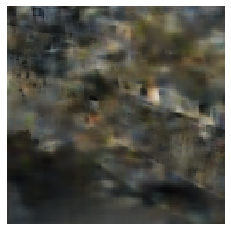

In [18]:
translateImage(listImg, targetImg, saveDir, "test", generatorList)

In [27]:
dcImages = imgLoader('predicted/dcgan/test')
pixImages = imgLoader('predicted/pix/test')

In [28]:
titles = ["INPUT", "PIX2PIX", "DCGAN", "TARGET"]
figSize = (10,30)

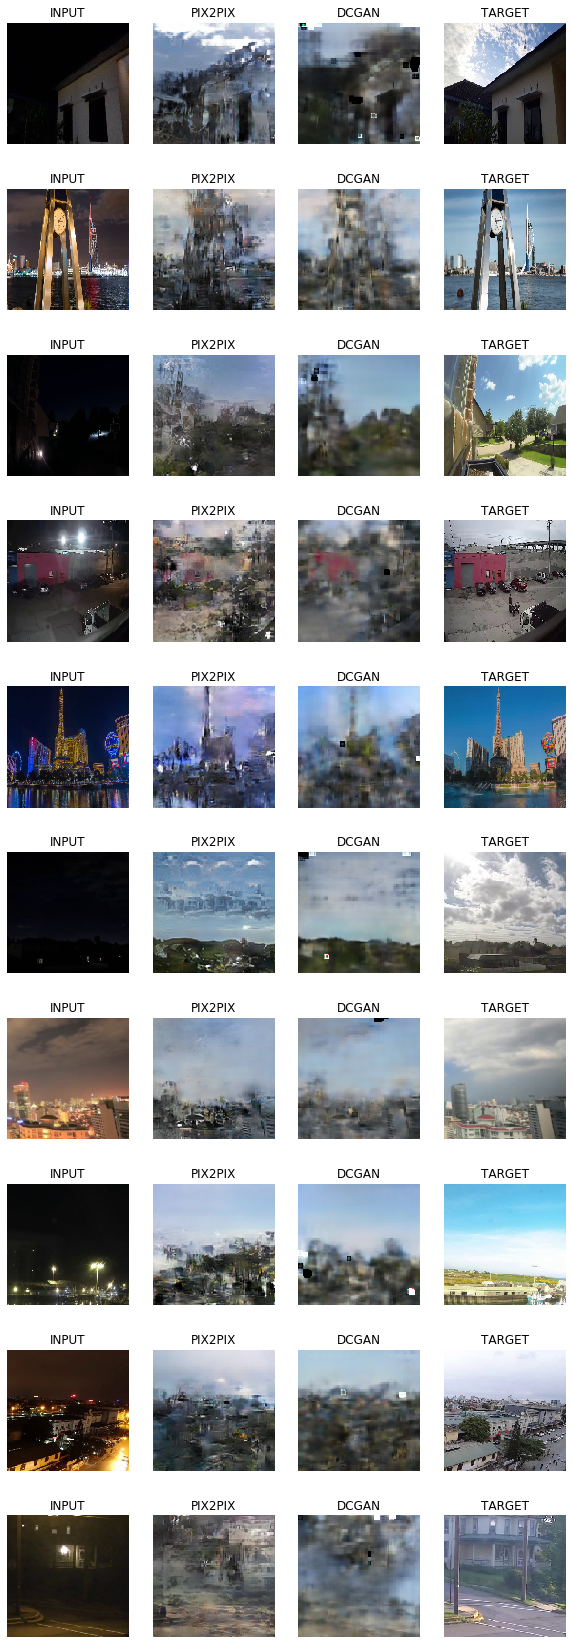

In [29]:
plotTranslatedImage(10, [listImg, pixImages, dcImages, targetImg], titles, figSize)

In [30]:
def l2Norm(target, generated_output):
    return (np.square(target - generated_output)).mean()

In [31]:
def ssimNorm(target, generated_output):
    return np.mean(structural_similarity(target, generated_output, multichannel=True, full=True))

In [32]:
def evaluator(directory, targetImg, model, title):
    print("Directory",directory+'/'+title)
    img = imgLoader(directory+'/'+title)
    l2 = []
    ssim = []
    for i in range(5):
        l2.append(l2Norm(targetImg[i],img[i]))
        ssim.append(ssimNorm(targetImg[i],img[i]))
    
    print('{} --- L2 : {}'.format(model, np.mean(l2)))
    print('{} --- SSIM : {}'.format(model, np.mean(ssim)))

In [33]:
titleList = ['Pix2Pix', 'DCGAN 1000 data', 'DCGAN 3000 data', 'DCGAN']

In [34]:
for i in range(len(saveDir)):
    evaluator(saveDir[i], targetImg, titleList[i], 'test')
    print()

Directory H:\FINAL-TA/predicted/pix/test
Pix2Pix --- L2 : 0.06808976829051971
Pix2Pix --- SSIM : 0.3438718056213686

Directory H:\FINAL-TA/predicted/1000/test
DCGAN 1000 data --- L2 : 0.05985407903790474
DCGAN 1000 data --- SSIM : 0.369964399945946

Directory H:\FINAL-TA/predicted/3000/test
DCGAN 3000 data --- L2 : 0.06407387554645538
DCGAN 3000 data --- SSIM : 0.39434491754472123

Directory H:\FINAL-TA/predicted/dcgan/test
DCGAN --- L2 : 0.06292279064655304
DCGAN --- SSIM : 0.4080870178689332



In [25]:
for i in range(len(saveDir)):
    evaluator(saveDir[i], targetImg, titleList[i], 'train')
    print()

Directory H:\FINAL-TA/predicted/pix/train
Pix2Pix --- L2 : 0.02651998959481716
Pix2Pix --- SSIM : 0.5954887575331749

Directory H:\FINAL-TA/predicted/1000/train
DCGAN 1000 data --- L2 : 0.05303686857223511
DCGAN 1000 data --- SSIM : 0.519785006241793

Directory H:\FINAL-TA/predicted/3000/train
DCGAN 3000 data --- L2 : 0.04351085051894188
DCGAN 3000 data --- SSIM : 0.5048124359714345

Directory H:\FINAL-TA/predicted/dcgan/train
DCGAN --- L2 : 0.02492130547761917
DCGAN --- SSIM : 0.6762391798577628



## Test for individual image

In [30]:
def translateImage(generator, imgList):
    generatedImg = []
    idx = 0
    
    for i in range(len(imgList)):
        img = imgList[i].copy()
        pixel = imgList[i].reshape(1, 128, 128, 3)
        hasil = generator(pixel, training=False)
            
        name = "/res-{}.png".format(i)
            
        plt.imshow(hasil[0])
        plt.axis('off')
        display.clear_output(wait=True)
        plt.savefig("H:\FINAL-TA/predicted/out/"+name, bbox_inches = 'tight', pad_inches = 0)
                   
        generatedImg.append(hasil)
    
    return generatedImg

In [30]:
def plotTranslatedImage(nImage, zipImage, titles, figSize):
    
    # depend on what kind image to show
    # titles is like the image type : real image, predicted image, etc
    kindImage = len(titles)
    
    fig, ax = plt.subplots(nImage, kindImage, figsize=figSize)
    for i in range(kindImage):
        for j in range(nImage):
            image = zipImage[i][j]
#             if(i > 0):
#                 image = zipImage[i][j][0]
                
            ax[j][i].imshow(image, interpolation='none')
            ax[j][i].set_title(titles[i])
            ax[j][i].axis('off')
    
    plt.savefig('final-model-test.png')
    plt.show()

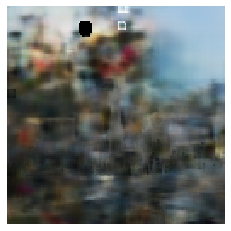

In [34]:
resultImages = translateImage(generator, images)